**1. 함수
$$
f(x,y)=x^2+y^2+xy-4x-8y
$$
에 대하여  초기위치 $(0,0)$에서 출발하여  경사하강법을 적용하려 한다.**

**(i) 학습률(learning rate) $1/2$로 두 걸음 갔을 때 위치를 구하시오.**

편미분을 통해 gradient
$$
\nabla f(x,y) = (2x+y-4, 2y+x-8)
$$
을 구합니다.  
초기위치 $(0,0)$에서 gradient는 $\nabla f(0,0) = (-4,-8)$이므로 학습률 $1/2$로 경사하강법을 적용해 한걸음 내려가면
$$
(0,0) - {1 \over 2} \nabla f(0,0) = (2,4)
$$
입니다.  
이 지점에서 gradient는 $\nabla f(2,4) = (4,2)$이므로 학습률 $1/2$로 경사하강법을 적용해 또 한걸음 내려가면
$$
(2,4) - {1 \over 2} \nabla f(2,4) = (2,4) - {1 \over 2}(4,2) = (0,3)
$$
입니다.

**(ii) gradident$\_$method.py를 수정하여 검산하시오.**

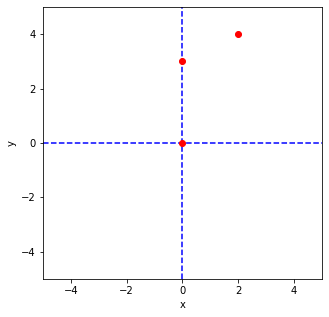

[[0.00000000e+00 0.00000000e+00]
 [2.00000000e+00 4.00000000e+00]
 [4.66116035e-12 3.00000000e+00]]


In [1]:
import sys
sys.path.append('C://Users//HAN//Documents//Deep Learning from Scratch//ch04') # 각자의 경로로 수정해주세요.

import numpy as np
import matplotlib.pylab as plt
from gradient_2d import numerical_gradient

def gradient_descent(f, init_x, lr=0.01, step_num=100):
    x = init_x
    x_history = []

    for i in range(step_num):
        x_history.append(x.copy())

        grad = numerical_gradient(f, x)
        x -= lr * grad

    return x, np.array(x_history)


def f(x):
    return x[0]**2 + x[1]**2 +x[0]*x[1] - 4*x[0] - 8*x[1]

init_x = np.array([0.0, 0.0])

lr = 1/2
step_num = 3
x, x_history = gradient_descent(f, init_x, lr=lr, step_num=step_num)

plt.figure(figsize=(5,5))
plt.plot( [-5, 5], [0,0], '--b')
plt.plot( [0,0], [-5, 5], '--b')
plt.plot(x_history[:,0], x_history[:,1], 'ro')

plt.xlim(-5, 5)
plt.ylim(-5, 5)
plt.xlabel("x")
plt.ylabel("y")
plt.show()

print(x_history)

**(iii) $\nabla f(x,y)=(0,0)$을 풀어 극점을 구하시오. 이계 도함수 판정법으로 최소점임을 보이시오.**

방정식
$$
(0,0) = \nabla f(x,y) = (2x+y-4, 2y+x-8)
$$
을 풀면 유일한 임계점
$$
(0,4)
$$
를 얻습니다.  
$$
{\partial^2 f \over \partial x^2}(0,4)=2>0
$$
이고
$$
\det
\begin{pmatrix}
{\partial^2 f \over \partial x^2}(0,4) &{\partial^2 f \over \partial y \partial x}(0,4)\\
{\partial^2 f \over \partial y \partial x}(0,4)&{\partial^2 f \over \partial y^2}(0,4)
\end{pmatrix}
=
\det
\begin{pmatrix}
2&1\\
1&2
\end{pmatrix}
=3>0
$$
이므로 이계 도함수 판정법에 의해 임계점 $(0,4)$는 극소점입니다.  
유일한 임계점이므로 최소점이겠지요.

**(iv) gradident$\_$method.py를 수정하여 학습률(learning rate) $0.1$로 삼십 걸음 갔을 때 다음과 같이 영역  $[-1,5]\times[-1,5]$ 위에서 궤적을 그리시오. 궤적의 좌표를 출력해서 위에서 구한 최소점을 향해 다가가는지 확인하시오.**

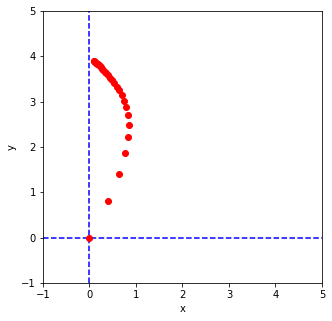

[[0.         0.        ]
 [0.4        0.8       ]
 [0.64       1.4       ]
 [0.772      1.856     ]
 [0.832      2.2076    ]
 [0.84484    2.48288   ]
 [0.827584   2.70182   ]
 [0.7918852  2.8786976 ]
 [0.7456384  3.02376956]
 [0.69413376 3.14445181]
 [0.64086183 3.24614807]
 [0.58807466 3.33283227]
 [0.5371765  3.40745835]
 [0.48899536 3.47224903]
 [0.44397139 3.52889969]
 [0.40228714 3.57872261]
 [0.36395745 3.62274938]
 [0.32889102 3.66180376]
 [0.29693244 3.6965539 ]
 [0.26789056 3.72754988]
 [0.24155746 3.75525085]
 [0.21772089 3.78004493]
 [0.19617222 3.80226386]
 [0.17671139 3.82219386]
 [0.15914972 3.84008395]
 [0.14331138 3.85615219]
 [0.12903389 3.87059061]
 [0.11616805 3.8835691 ]
 [0.10457753 3.89523848]
 [0.09413818 3.90573303]]


In [2]:
init_x = np.array([0.0, 0.0])
lr = 0.1
step_num = 30
x, x_history = gradient_descent(f, init_x, lr=lr, step_num=step_num)

plt.figure(figsize=(5,5))

plt.plot( [-1, 5], [0,0], '--b')
plt.plot( [0,0], [-1, 5], '--b')
plt.plot(x_history[:,0], x_history[:,1], 'ro')

plt.xlim(-1., 5.)
plt.ylim(-1., 5.)
plt.xlabel("x")
plt.ylabel("y")
plt.show()

print(x_history)

**(v) 3d graph and 2d contour.py를 참고하여 다음과 같이 함수 $f$의 등위선 30개를 그리시오. 등위선의 어떤 방향으로 점이 이동하는지 설명하시오.**
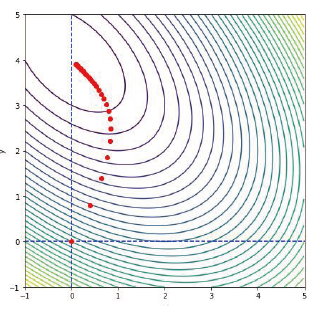

등위선과 gradient는 항상 수직입니다.  
따라서, 경사하강법을 적용하면 점은 등위선에 수직인 방향으로 이동해 갑니다.

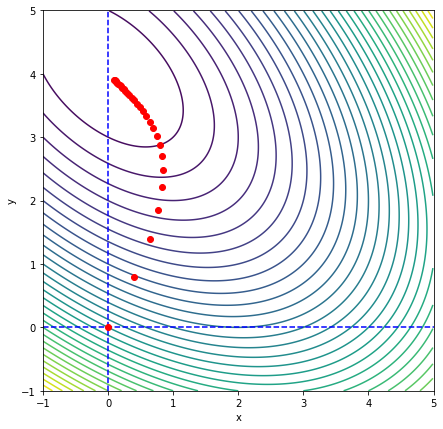

In [3]:
from mpl_toolkits.mplot3d import Axes3D

plt.figure(figsize=(7,7))
x = np.arange(-1, 5, 0.01)
y = np.arange(-1, 5, 0.01)
X, Y = np.meshgrid(x, y)
Z=f([X,Y])

plt.contour(X,Y,Z,levels=30)

init_x = np.array([0.0, 0.0])
lr = 0.1
step_num = 30
x, x_history = gradient_descent(f, init_x, lr=lr, step_num=step_num)

plt.plot( [-1, 5], [0,0], '--b')
plt.plot( [0,0], [-1, 5], '--b')
plt.plot(x_history[:,0], x_history[:,1], 'ro')

plt.xlim(-1., 5.)
plt.ylim(-1., 5.)
plt.xlabel("x")
plt.ylabel("y")
plt.show()

**2. 4차 함수
$$
f(x)=x(x-1)(x-2)(x-4)
$$
를 생각하자.
learning rate는 0.02로 잡고  열 발자국을 경사하강법으로 내려가려 한다.
출발점을 $x$ 절편 $x=0,1,2,4$로 잡았을 때 그래프 위의 점들의 경로를 다음과 같이 그리시오.**
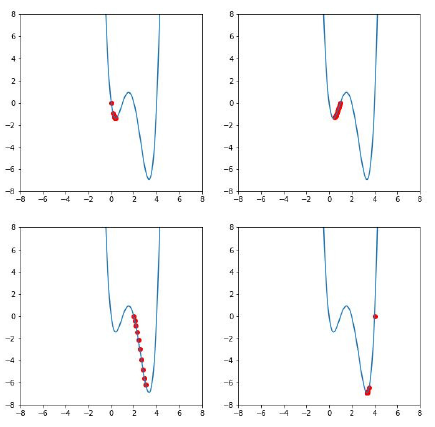

$x=2$나 $x=4$에서 출발하면 최소점을 향해 다가가지만 $x=0$이나 $x=1$에서 출발하면 그렇지 않습니다.  
이처럼 경사하강법은 출발점이 중요합니다.

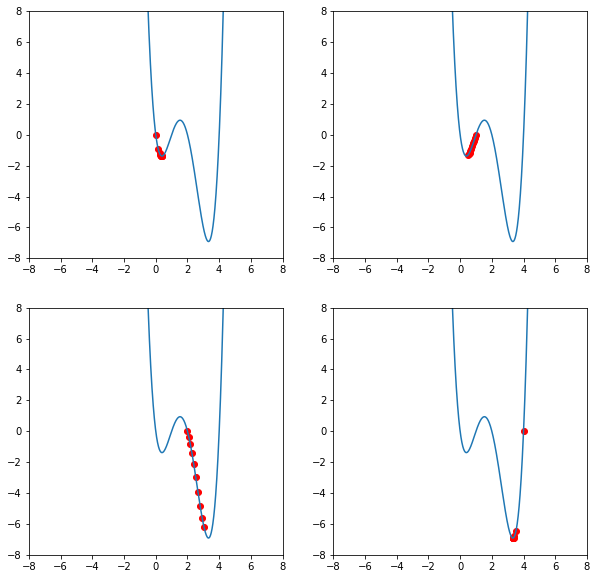

In [4]:
def f(x):
    return x*(x-1.0)*(x-2.0)*(x-4.0)


def df(x):
    return (x-1.0)*(x-2.0)*(x-4.0)+x*(x-2.0)*(x-4.0)+x*(x-1.0)*(x-4.0)+x*(x-1.0)*(x-2.0)

init_position = [0.0,1.0,2.0,4.0]

lr=0.02
step_num=10

idx = 1

X = np.arange(-5.0, 5.0, 0.01)
Y = f(X)

plt.figure(figsize=(10,10))

for init_x in init_position:
    x = init_x
    x_history = []

    for i in range(step_num):
        x_history.append(x)
        x -= lr * df(x)

    plt.subplot(2, 2, idx)
    plt.plot(np.array(x_history), f(np.array(x_history)), 'o', color="red")
    plt.plot(X,Y)
    plt.ylim(-8, 8)
    plt.xlim(-8, 8)
    idx += 1
    
plt.show()